
# Machine Learning Engineer Nanodegree
## Capstone Project
Hui-yu Yang
December 31st, 2050

## I. Definition

### Project Overview

Backorders happen when supply outstrips the demand, which is a problem for businesses that may result in lower customer satisfaction or even loss of loyal customers. Multiple factors such as incompetent management, miscommunication, or lack of data to accurately forecast the demand. An accurate prediction of backorders can prevent competitor taking advantages of the situation, or potentially losing loyal customers. 

### Problem Statement

My main objective is to implement a model using a supervised machine learning technique for backorder predictions. After a model is selected based on the performance metrics, parameter tuning will be performed. In the end, the features that are most important for backorder prediction will also be presented.

For this project, the following tasks will be performed:  
1. Download and preprocess the Kaggle- "Can you predict backorders" data
2. Data exploration and visualization 
3. Compare several supervised machine learning techniques to acquire the best model 
4. Parameter tuning for the selected model 
5. Model evaluation
 

### Metrics

Even though accuracy is the most common metric for binary classifiers, it is not a good metric for imbalanced data as it is misleading due to the accuracy paradox. Accuracy only reflects the underlying distribution when the data is imbalanced, not how good the prediction is. Due to the highly imbalanced dataset with 1:143 ratio, we will use the metrics below instead: 

- **confusion matrix**: a 2 by 2 table showing a breakdown of correct and incorrect predictions. A confusion matrix shows the number of true positive (TP), false negative (FN), false positive (FP), and true negative (TN). 


- **precision**: measure of classifier's exactness
$$ Precision=\frac{TP}{TP + FP} $$


- **recall**: measure of classifier's completeness
$$ Recall=\frac{TP}{TP + FN} $$


- **F1 score**: weighted average of precision and recall
$$ F_{1}= \frac{2TP}{2TP + FP + FN} $$


- **Cohen's kappa**: classification accuracy normalized by the imbalance of the data


- **ROC curve**: graphical examination of sensitivity vs 1-specificity. It exhibits the balance threasholds of sensitivity and specificity, which can be used for model selection.



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import visuals as vs

from IPython.display import display # Allows the use of display() for DataFrames

# hide warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)

# Pretty display for notebooks
%matplotlib inline

# Load the backorder data
try:
    train_data = pd.read_csv("./data/Kaggle_Training_Dataset_v2.csv", low_memory = False, na_values=" NaN")
    train_data.dropna(how="all", inplace=True) #remove trailing line with empty row
    train_data = train_data[:-1]
    #print("Training dataset has {} samples with {} features each.".format(*train_data.shape))
    
    test_data = pd.read_csv("./data/Kaggle_Test_Dataset_v2.csv", low_memory = False, na_values=" NaN")
    test_data.dropna(how="all", inplace=True) #remove trailing line with empty row
    test_data = test_data[:-1]
    #print("Test dataset has {} samples with {} features each.".format(*test_data.shape))
        
except:
    print("Dataset could not be loaded. Is the dataset missing?")

## II. Analysis

### Data Exploration

Data files Kaggle_Training_Dataset_v2.csv and Kaggle_Test_Dataset_v2.csv can be downloaded [here](https://www.kaggle.com/tiredgeek/predict-bo-trial)$^1$. The training set has 1687861 samples and the test set has 242076 samples. Both of them have 22 features and 1 target variable. The data sample showed that there are missing data, text data, and some values such as -99 that may signal missing values (Table 1). The sample showed 22 features including target variable since one feature was used as the index. 

In [2]:
# reset index to sku
train_data = train_data.set_index('sku')
print ('Table 2.1: Sample Data from Training Set')
train_data.head(3)

Table 2.1: Sample Data from Training Set


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


Training set and testing set has similar backorders rate, and the training set and testing set are both imbalanced with a ratio of 1:143 and 1:86, respectively (Table 2).

In [3]:
# Get data characteristics on the training set
n_orders = round(len(train_data),0)
n_bo = len(train_data[train_data['went_on_backorder'] == 'Yes'])
bo_rate = float(n_bo)/n_orders * 100

test_n_orders = round(len(test_data),1)
test_n_bo = len(test_data[test_data['went_on_backorder'] == 'Yes'])
test_bo_rate = float(test_n_bo)/test_n_orders * 100

# Print the results
#print("Sample Size (training set)): {}".format(n_orders))
#print("Sample Size (test set)): {}".format(test_n_orders))
#print("Backorder rate (training set): {:.2f}%".format(bo_rate))
#print("Backorder rate (test set): {:.2f}%".format(test_bo_rate))
#print("turn into table later")

basic_df = pd.DataFrame([['{:.0f}'.format(n_orders), '{:.0f}'.format(test_n_orders)], 
                         ['{:.3f}'.format(bo_rate), '{:.3f}'.format(test_bo_rate)]], 
                        index=['Sample Size', 'Backorder Rate (%)'], 
                        columns=['Training Set', 'Test Set'])
print 'Table 2.2: Characteristics of Training and Test Set'
basic_df

Table 2.2: Characteristics of Training and Test Set


,Training Set,Test Set
Sample Size,1687860,242075
Backorder Rate (%),0.669,1.110


We can see that national_inv, perf_6_month_avg and perf_12_month_avg contains negative values, particularly -99 (Table 3). We can assume these are missing values and we can impute these in the preprocessing step. All of the categorical features are binary, and we should convert them into dummy variables for analysis purpose (Table 4). 

In [4]:
#Display a description of the dataset
print 'Table 2.3: Summary Statistics on Numerical Data'
display(train_data.describe()) 

Table 2.3: Summary Statistics on Numerical Data


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [5]:
# summarize categorical data
print 'Table 2.4: Summary Statistics on Categorical Data'
train_data.describe(include=['O'])

Table 2.4: Summary Statistics on Categorical Data


,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,1686953,1300377,1687615,1484026,1626774,1687129,1676567


We will examine whether there are any abnormalities in the data that needs to be addressed. Both performance metrics (perf_6_month_avg, perf_12_month_avg) are skewed to the left, so we will impute them with their median in the preprocessing step (Fig. 1). As for missing values, the only feature with missing value is lead_time, and about 6% of lead_time is missing (Table 5). 

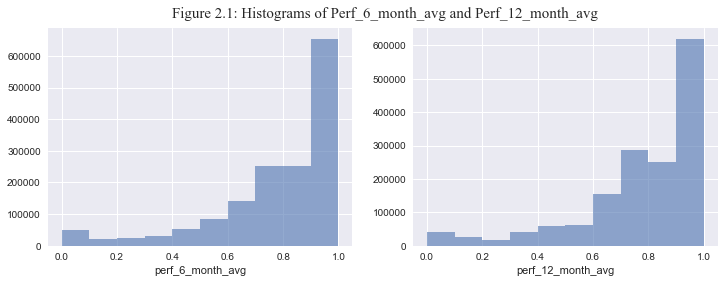

In [6]:
# Create histograms of performance metrics without -99 values
temp = train_data.copy()
for col in ['perf_6_month_avg', 'perf_12_month_avg']: 
    temp[col][(temp[col] == -99)] = None
temp = temp.dropna() 
csfont = {'fontname':'Times New Roman', }
plt.figure(figsize=(12,4))
plt.subplot(121)
fig1 = plt.hist(temp.perf_6_month_avg, alpha = 0.6)
plt.xlabel('perf_6_month_avg')
plt.text(0.4, 720000, 'Figure 2.1: Histograms of Perf_6_month_avg and Perf_12_month_avg', size=15, **csfont)
plt.subplot(122)
fig1 = plt.hist(temp.perf_12_month_avg, alpha = 0.6)
plt.xlabel('perf_12_month_avg')
plt.savefig('plots/f1.png', dpi=300)

In [53]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print 'Table 2.4.2 Number of Missing Data for each Feature (Not used in doc)'
missing_data.head(20)

Table 2.4.2 Number of Missing Data for each Feature (Not used in doc)


,Total,Percent
lead_time,100893,0.059776
went_on_backorder,0,0.000000
rev_stop,0,0.000000
in_transit_qty,0,0.000000
forecast_3_month,0,0.000000
forecast_6_month,0,0.000000
forecast_9_month,0,0.000000
sales_1_month,0,0.000000
sales_3_month,0,0.000000
sales_6_month,0,0.000000


We performed outlier detection to avoid any particular data point (influential point) influencing our analysis results. Even though there are several methods for determining outliers in a sample, we will use a popular method called *Tukey Fences.* Tukey used the quartiles to define "fences," and the values that fall outside the inner fences are considered to be outliers. 

The fences are: 
* Upper inner fence: Q3 + 1.5*IQR
* Lower inner fence: Q1 - 1.5*IQR 

where Q1 is the first quartile (25th percentile), Q3 is the third quartile (75th percentile), and IQR are the interquartile range, or Q3 - Q1. The weakness of this fence-rule is that the length of the two whiskers are identical, or if the data has a symmetric distribution. However, we have transformed the data and so this should not be problem.

However, if we remove outliers that are outlying for more than 1 feature, then we would lose about 46% of data. It is too much data, so we will simply use a machine learning technique that's insensitive to outliers in the analysis step. 

### Exploratory Visualization 

The boxplot of numerical features showed that most numerical features are greater than 0 except national_inv (Fig. 2). The variance of national_inv is much larger than the other variables as well. The scatterplot matrix showed that the forecasting metrics are linearly correlated, so are the sales metrics (Fig. 3). That makes sense as those variables are essentially snapshot of the same variable at a different time. All of the forecasting and sales variables are skewed to the right and nearly all show a linear trend (Fig. 4). 

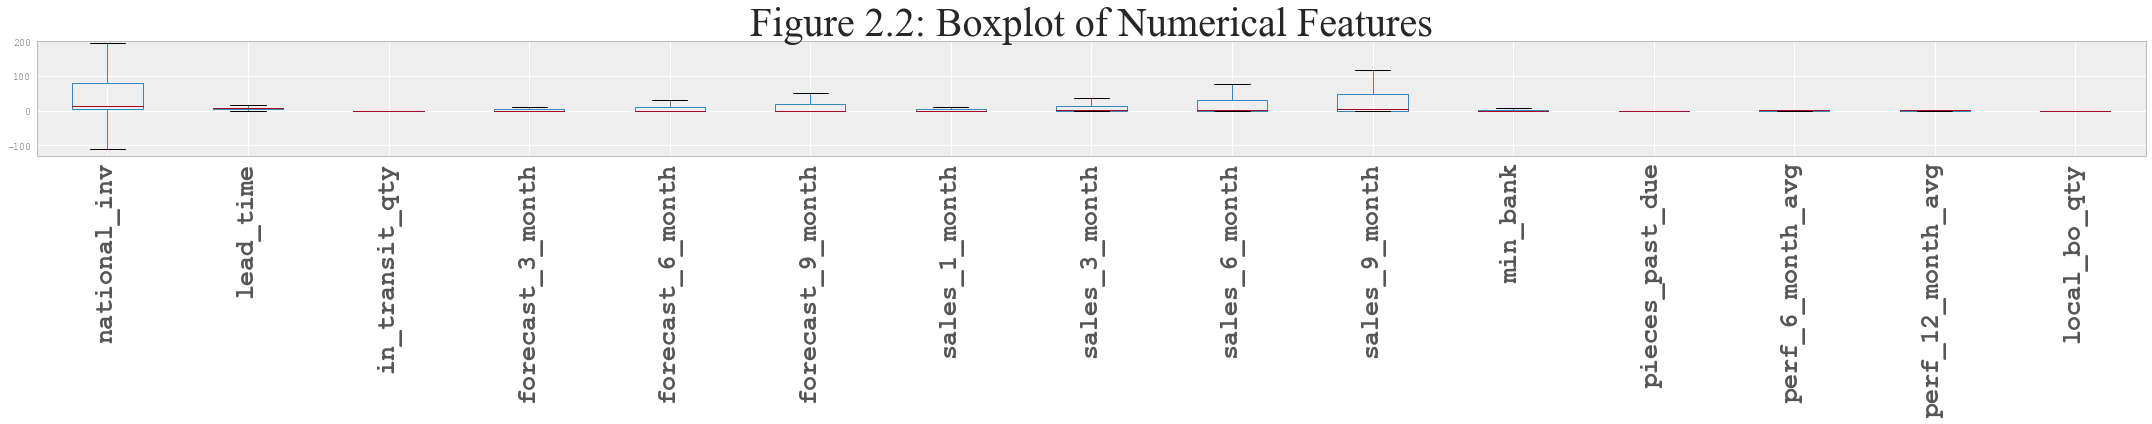

In [8]:
# Make a boxplot of numerical variables
pd.options.display.mpl_style = 'default'
plt.figure(figsize=(30,6))
axes = train_data.boxplot(fontsize =20)
axes.set_ylim(-130, 200)
plt.title("Figure 2.2: Boxplot of Numerical Features", fontsize=40, **csfont)
plt.xticks(rotation=90, fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.savefig('plots/f2.jpeg', dpi=300)

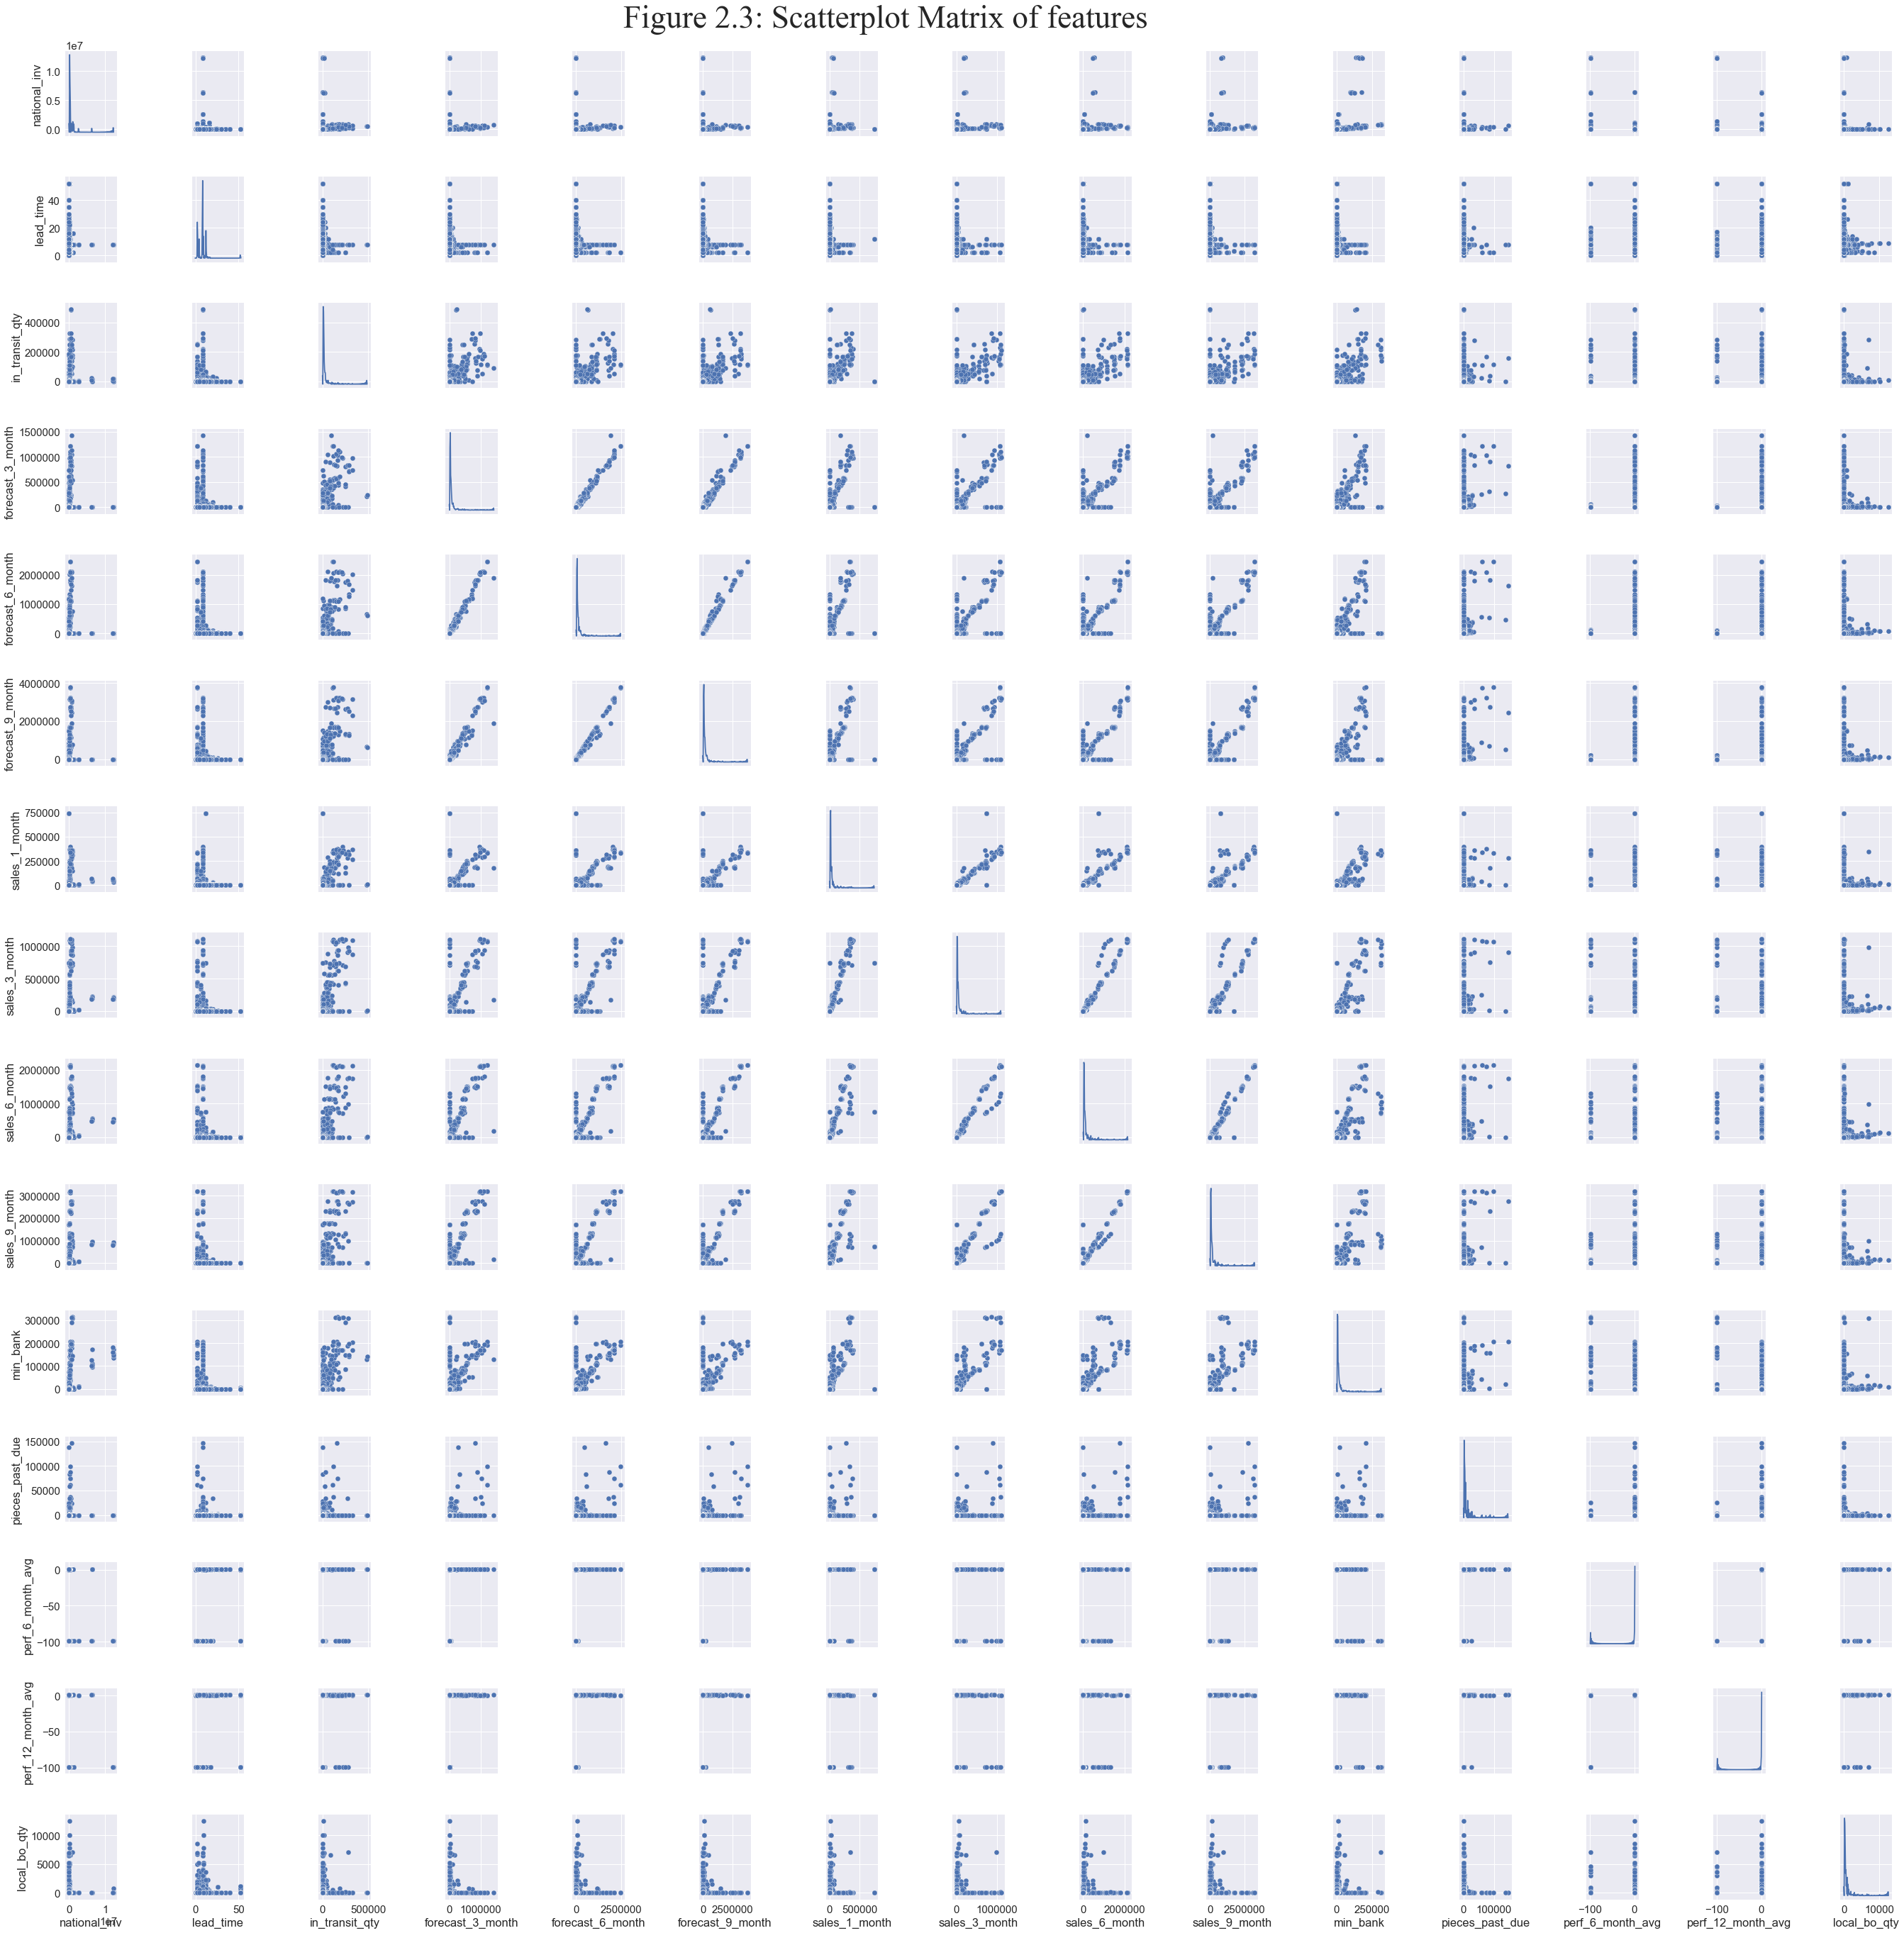

In [9]:
# Produce a scatter matrix for each pair of features in the data
#sample = train_data.sample(frac=0.005, replace=True)
sns.set(font_scale=1.5)
grid= sns.pairplot(train_data, diag_kind="kde")
# tital above plot
grid.fig.text(0.33, 1.0,'Figure 2.3: Scatterplot Matrix of features', fontsize=45, **csfont)
plt.xticks(fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.savefig('plots/f3.png')

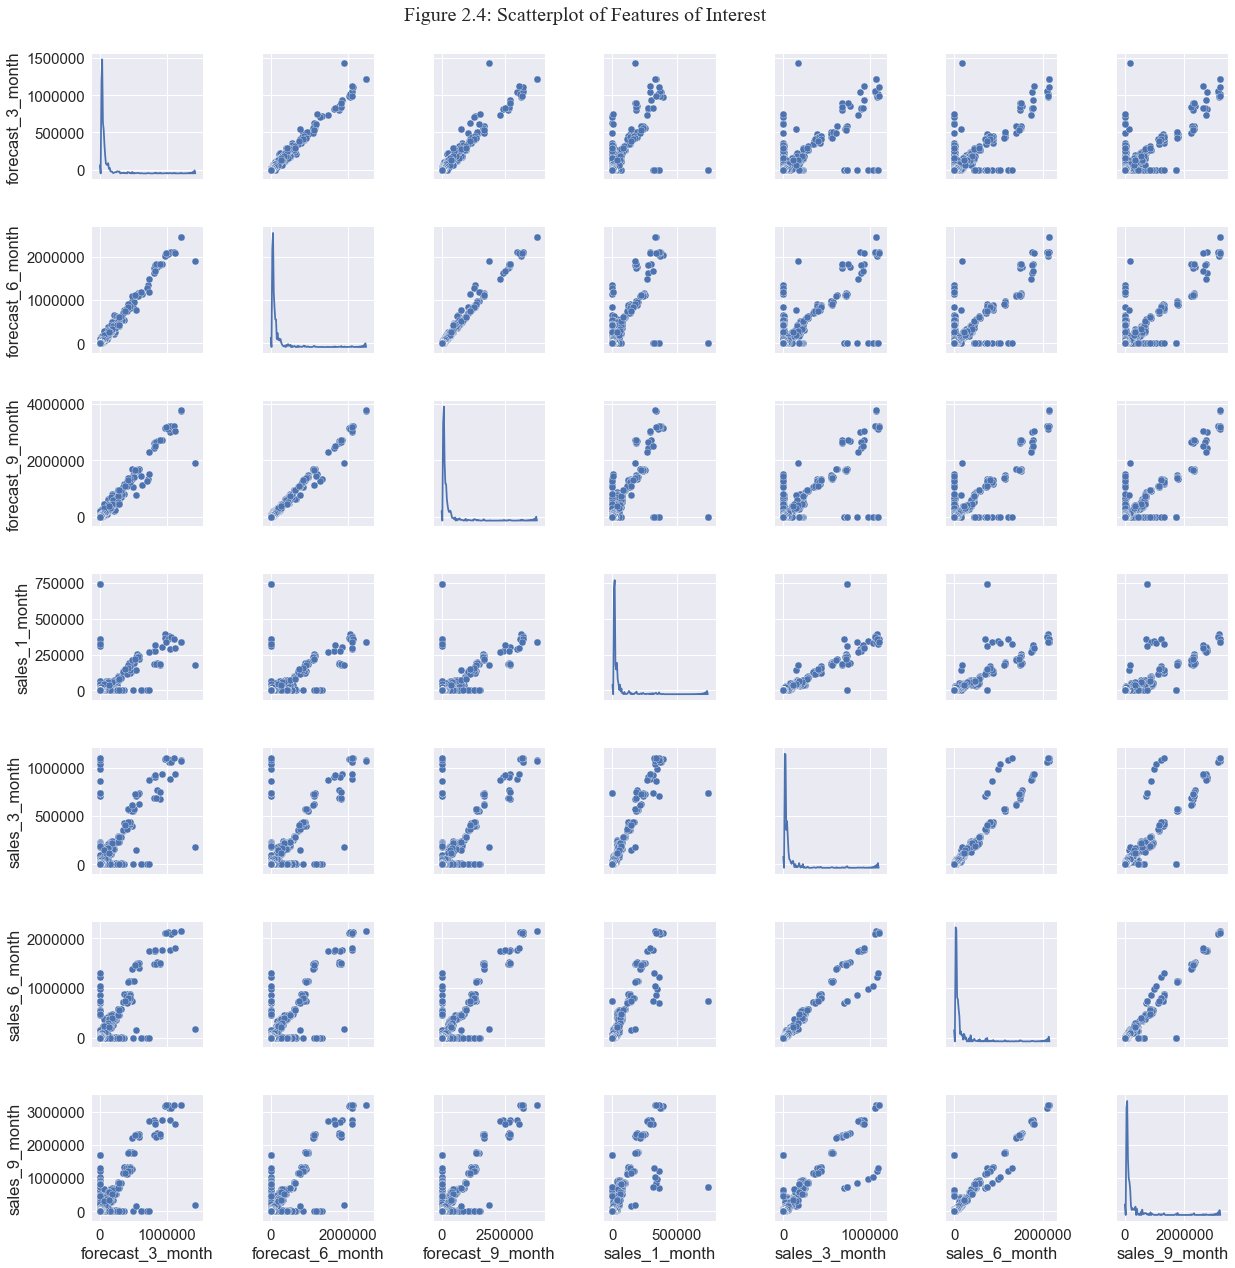

In [10]:
# further explore the relaitonship between correlated features

#sample = train_data.sample(frac=0.005, replace=True)
subset1 = train_data[['forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month','sales_6_month', 'sales_9_month' ]]
sns.set(font_scale=1.5)
grid= sns.pairplot(subset1, diag_kind="kde")
# tital above plot
grid.fig.text(0.33, 1.0,'Figure 2.4: Scatterplot of Features of Interest', fontsize=20, **csfont)
plt.xticks(fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.savefig('plots/f4.png')

The heatmap of features also showed the forecasting and sales features are correlated (Fig. 5). However, on top of that, it also showed that perf_6_month_avg and perf_12_month_avg are highly correlated with a correlation of 0.97. In addition, variables in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month, and min_bank are highly correlated as well. This strong correlation showed multicollinearity of these variables and these variables give almost the same information (Fig. 6). 

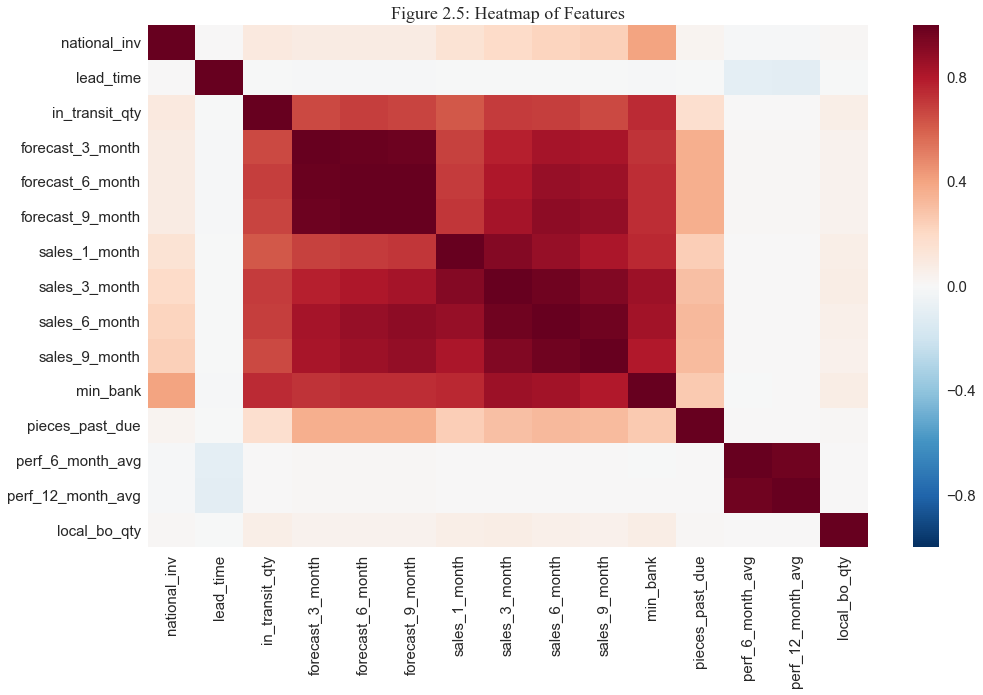

In [11]:
# heatmap of features
plt.figure(figsize=(15, 10))
sns.plt.title('Figure 2.5: Heatmap of Features', **csfont)
sns.heatmap(train_data.corr());
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.tight_layout()
plt.savefig('plots/f5.png', dpi=300)

In [12]:
train_data.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003326,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,-0.013544,-0.010732,0.014887
lead_time,0.003326,1.000000,-0.007238,-0.008010,-0.008513,-0.008738,-0.006013,-0.007279,-0.007270,-0.007313,-0.008198,-0.001500,-0.099940,-0.106019,-0.001306
in_transit_qty,0.098238,-0.007238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.003282,0.004292,0.066612
forecast_3_month,0.078199,-0.008010,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.008445,0.008694,0.039419
forecast_6_month,0.079744,-0.008513,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.008343,0.008499,0.039724
forecast_9_month,0.078948,-0.008738,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.008306,0.008421,0.039732
sales_1_month,0.147449,-0.006013,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.001163,0.002370,0.066188
sales_3_month,0.192605,-0.007279,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.001488,0.002837,0.071030
sales_6_month,0.225067,-0.007270,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.002898,0.004221,0.057765
sales_9_month,0.239613,-0.007313,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.003438,0.004749,0.048880


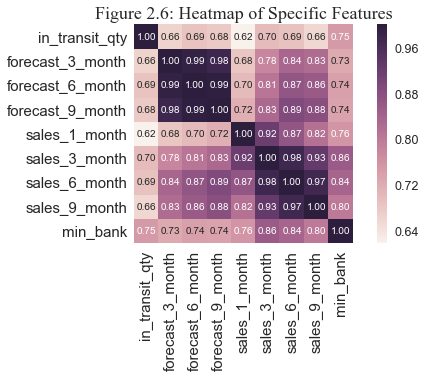

In [13]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
cols = train_data.columns[2:11]
sns.plt.title('Figure 2.6: Heatmap of Specific Features', **csfont)
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()
plt.xticks(rotation=90);
plt.savefig('plots/f6.jpeg')

### Algorithms and Techniques

The supervised machine learning algorithms that were applied for this binary classification problem are: Decision Tree, Bagging, Random Forest, Adaptive Boosting (AdaBoost), and Gradient Boosting.  

Decision Tree is a nonparametric method that has no assumptions about the space distribution and the classifier structure. It splits the data into two or more homogeneous sets based on the most significant splitter in features. It is one of the fastest way to identify the most significant features and the relation between the features. It requires less data cleaning compares to other techniques as its not influenced by outliers and missing values to a fair degree. It can also handle both numerical and categorical features like we have in the data. This method is based on 'gini index' or 'entropy,' which doesn't rely on accuracy and it is perfect for our imbalanced data. The splitting rules can force both classes to be addressed.

Bagging combines the result of multiple classifiers modeled on different sub-samples of the same data set to reduce the variance of our predictions. First it creates multiple datasets from the original data with replacement, then it build multiple classifiers on each data set. Lastly, the predictions of all the classifiers are combined using their mean, median, or mode value depends on the problem. 

Random Forest is an ensemble bagging method that is formed by a group of weak models (trees) to form a powerful model. It undertakes dimensional reduction models, treats missing values and outliers. To classify a new object based on attributes, each tree will come up with their classification and the classification having the most votes from the trees will be the classification for the new object. Random Forest has the power of handle large data set with higher dimensionality. On top of that, it outputs Importance of features. It has methods for balancing errors in data sets where classes are imbalanced like ours.

Gradient Boosting and AdaBoost are both boosting methods. Boosting technique combines weak learner to form a strong learner. First the base learning machine learning techniques with a different distribution were applied to generate a weak prediction rule. Boosting focuses more on cases with misclassification from the preceding weak learners. After several iterations, the boosting algorithm combines them into a single strong prediction rule until the limit of base learning algorithm is reached or higher accuracy is achieved.  

Gradient boosting is a method that allows a system to learn based on regression analysis and classification. It is a combination of Gradient Descent and Boosting. The result is that the machine might be able to predict outcomes based on history. Adaboost is short for adaptive boosting, which describes an algorithm for using other methods to produce a statistically weighted outcome, which the machine can then use to boost classification of use cases.

All of these methods are either emsemble methods or good at dealing with class imbalance. 

### Benchmark

The naive predictor for our benchmark predictor is logistic regression. A natural choice for binary classification. 


In [2]:
# Import libraries 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import visuals as vs
import xgboost

# Display options
from IPython.display import display # Allows the use of display() for DataFrames
import warnings # hide warnings
warnings.filterwarnings('ignore')
# pretty display
%matplotlib inline 

# Load data
try:
    train_df = pd.read_csv("./processed_train.csv", low_memory = False)
    #print("Training dataset has {} samples with {} features each.".format(*train_df.shape))
    test_df = pd.read_csv("./processed_test.csv", low_memory = False)
    #print("Testing dataset has {} samples with {} features each.".format(*test_df.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

In [3]:
# reset index to sku
train_df = train_df.set_index('sku'); test_df= test_df.set_index('sku')
# remove rows with NaN for all values
train_df = train_df.dropna(how = 'all')

In [4]:
from sklearn import cross_validation
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

features = train_df.drop('went_on_backorder', axis=1, inplace=False).columns.values.tolist()

X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(train_df[features],train_df['went_on_backorder'],
                                                                     test_size=0.2, random_state=0)
#create classifiers
lreg = LogisticRegression(random_state=100) 

# train classifiers
lreg.fit(X_train, y_train)
# obtain predictions
lregpreds = lreg.predict(X_validation)

In [11]:
from sklearn.metrics import f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix

# get statistics
lreg_cm = confusion_matrix(y_validation, lregpreds)
lreg_precision = precision_score(y_validation, lregpreds)  
lreg_recall = recall_score(y_validation, lregpreds) 
lreg_f1 = f1_score(y_validation, lregpreds) 
lreg_kappa = cohen_kappa_score(y_validation,lregpreds) 

print lreg_precision, lreg_recall, lreg_f1, lreg_kappa

0.107142857143 0.00134408602151 0.00265486725664 0.00248104866735


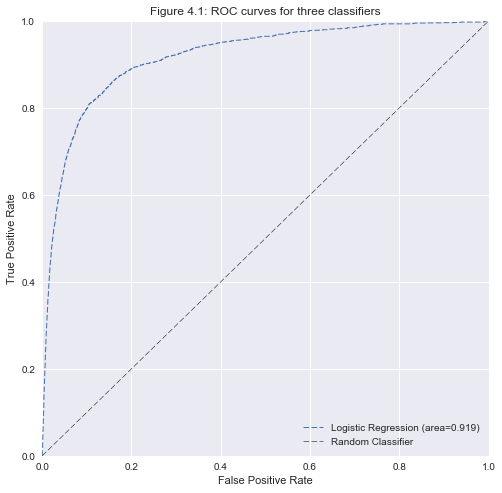

In [10]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))
    
f, ax = plt.subplots(figsize=(8,8))

roc_auc_plot(y_validation, lreg.predict_proba(X_validation),label='Logistic Regression',l='--')
ax.plot([0,1], [0,1], color='black', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Figure 4.1: ROC curves for three classifiers')
sns.despine()

## III. Methodology

### Data Preprocessing

The following steps were performed during data preprocessing:  
- Converted text "Yes" and "No" into 1 and 0 values for the risk factors, namely, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, and rev_stop. The target variable was converted as well. 
- Set the -99 values for performance avg metrics (perf_6_month_avg, perf_12_month_avg) to missing, then imputed them with median because they are both skewed. 
- Normalized the numerical variables before applying methods like PCA or other techniques, so all the variables have an equal variance and will not cause any ill-condition for statistical methods such as PCA, which projects the data onto directions which maximize the variance. 

### Implementation

Six supervised machine learning techniques were implemented and compared based on the metrics mentioned previously. The code snippet is shown below: 

In [17]:
from sklearn import cross_validation
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

features = train_df.drop('went_on_backorder', axis=1, inplace=False).columns.values.tolist()

X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(train_df[features],train_df['went_on_backorder'],
                                                                     test_size=0.2, random_state=0)
#create classifiers
xgbclf = XGBClassifier(random_state=100) 
gbclf = GradientBoostingClassifier(random_state=100) 
rfclf = RandomForestClassifier(random_state=100) 
dtclf = DecisionTreeClassifier(random_state=100) 
abclf = AdaBoostClassifier(random_state=100) 
bclf = BaggingClassifier(random_state=100)

# train classifiers
xgbclf.fit(X_train, y_train)
gbclf.fit(X_train, y_train)
rfclf.fit(X_train, y_train)
dtclf.fit(X_train, y_train)
abclf.fit(X_train, y_train)
bclf.fit(X_train, y_train)

# obtain predictions
xgbpreds = xgbclf.predict(X_validation)
gbpreds = gbclf.predict(X_validation)
rfpreds = rfclf.predict(X_validation)
dtpreds = dtclf.predict(X_validation)
abpreds = abclf.predict(X_validation)
bpreds = bclf.predict(X_validation)

### Refinement
#### Model Tuning

The model selected was XGBoost, short for Scalable and flexible gradient boosting. With XGBoost package, we performed parameter tuning with GridSearchCV. We will first fix learning rate and several estimators for tuning tree-based parameters. The initial estimates will be tuned later as well. Lets take the following values:

- max_depth = 5 : maximum depth of a tree, typically between 3 and 10.
- min_child_weight = 1 : A smaller value is chosen due to our imbalanced outcome. It's also used to control over-fitting. 
- gamma = 0 : gamma specifies the minimum loss reduction required to make a split. A smaller value like 0.1-0.2 can also be chosen for starting. 
- subsample, colsample_bytree = 0.8 : the fraction of observations to be randomly samples for each tree.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. It's typically set between 0.5 and 1. 
- scale_pos_weight = 1: a value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

A detailed result from parameter tuning is shown in Table 7. 

In [18]:
df = pd.DataFrame([['Maximum depth of a tree', '(3, 5, 7, 9, 11-24)', 23], 
                   ['Minimum sum of instance weight (hessian) needed in a child node', '(1,3)', 1], 
                   ['Minimum loss reduction required to make a further partition on a leaf node of the tree', '(0, 0.1, 0.2, 0.3)', 0], 
                   ['Subsample ratio of the training instance', '(0.6, 0.7, 0.8, 0.9, 1.0)', 1.0], 
                   ['Subsample ratio of columns when constructing each tree', '(0.6, 0.7, 0.8, 0.9)', 0.8],
                   ['L1 regularization term on weights', '(0, 1e-5, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 100)', 0.01], 
                   ['Step size shrinkage used in update to prevents overfitting', '(0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1)', 0.2]
                  ], index=['Max_depth', 'Min_child_weight', 'Gamma', 'Subsample', 'Colsample_bytree', 'Reg_alpha', 'Learning Rate'], columns=['Definition', 'Values Tried', 'Optimized Value'])

# Assuming that dataframes df1 and df2 are already defined:
print 'Table 7. Parameter Tuning Details'
display(df)

Table 7. Parameter Tuning Details


,Definition,Values Tried,Optimized Value
Max_depth,Maximum depth of a tree,"(3, 5, 7, 9, 11-24)",23.00
Min_child_weight,Minimum sum of instance weight (hessian) needed in a child node,"(1,3)",1.00
Gamma,Minimum loss reduction required to make a further partition on a leaf node of the tree,"(0, 0.1, 0.2, 0.3)",0.00
Subsample,Subsample ratio of the training instance,"(0.6, 0.7, 0.8, 0.9, 1.0)",1.00
Colsample_bytree,Subsample ratio of columns when constructing each tree,"(0.6, 0.7, 0.8, 0.9)",0.80
Reg_alpha,L1 regularization term on weights,"(0, 1e-5, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 100)",0.01
Learning Rate,Step size shrinkage used in update to prevents overfitting,"(0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1)",0.20


## IV. Results

### Model Selection

With ROC curves (Fig. 7), we can see that boosting techniques (XGB, Gradient Boosting, AdaBoost) perform the best among all.  For precision/recall, XGB is the best if we take an average of precision and recall (Table 8). For F1 score and Kappa score, decision tree is the best. 

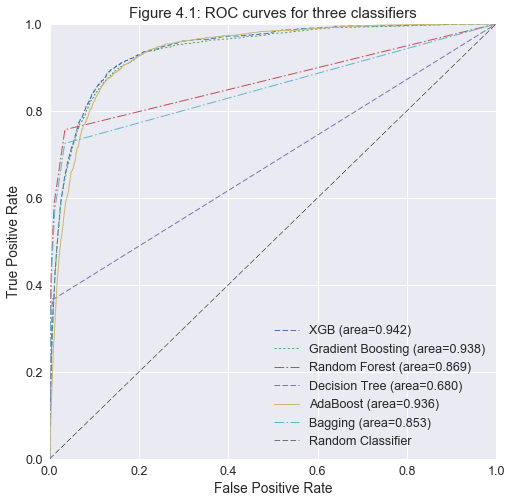

In [19]:
# show ROC curve  
f, ax = plt.subplots(figsize=(8,8))

roc_auc_plot(y_validation, xgbclf.predict_proba(X_validation),label='XGB',l='--')
roc_auc_plot(y_validation, gbclf.predict_proba(X_validation),label='Gradient Boosting', l=':')
roc_auc_plot(y_validation, rfclf.predict_proba(X_validation),label='Random Forest',l='-.')
roc_auc_plot(y_validation, dtclf.predict_proba(X_validation),label='Decision Tree',l='--')
roc_auc_plot(y_validation, abclf.predict_proba(X_validation),label='AdaBoost',l='-')
roc_auc_plot(y_validation, bclf.predict_proba(X_validation),label='Bagging',l='-.')

ax.plot([0,1], [0,1], color='black', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Figure 4.1: ROC curves for three classifiers')
sns.despine()
plt.savefig('plots/f7.jpeg')

In [20]:
from sklearn.metrics import f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix

# get statistics
xgb_cm = confusion_matrix(y_validation, xgbpreds)
xgb_precision = precision_score(y_validation, xgbpreds)  
xgb_recall = recall_score(y_validation, xgbpreds) 
xgb_f1 = f1_score(y_validation, xgbpreds) 
xgb_kappa = cohen_kappa_score(y_validation, xgbpreds.astype(np.int64)) 

gb_cm = confusion_matrix(y_validation, gbpreds)
gb_precision = precision_score(y_validation, gbpreds)  
gb_recall = recall_score(y_validation, gbpreds) 
gb_f1 = f1_score(y_validation, gbpreds) 
gb_kappa = cohen_kappa_score(y_validation, gbpreds.astype(np.int64)) 

rf_cm = confusion_matrix(y_validation, rfpreds)
rf_precision = precision_score(y_validation, rfpreds)  
rf_recall = recall_score(y_validation, rfpreds) 
rf_f1 = f1_score(y_validation, rfpreds) 
rf_kappa = cohen_kappa_score(y_validation, rfpreds.astype(np.int64)) 

dt_cm = confusion_matrix(y_validation, dtpreds)
dt_precision = precision_score(y_validation, dtpreds)  
dt_recall = recall_score(y_validation, dtpreds) 
dt_f1 = f1_score(y_validation, dtpreds) 
dt_kappa = cohen_kappa_score(y_validation, dtpreds.astype(np.int64))

ab_cm = confusion_matrix(y_validation, abpreds)
ab_precision = precision_score(y_validation, abpreds)  
ab_recall = recall_score(y_validation, abpreds) 
ab_f1 = f1_score(y_validation, abpreds) 
ab_kappa = cohen_kappa_score(y_validation, abpreds.astype(np.int64))

b_cm = confusion_matrix(y_validation, bpreds)
b_precision = precision_score(y_validation, bpreds)  
b_recall = recall_score(y_validation, bpreds) 
b_f1 = f1_score(y_validation, bpreds) 
b_kappa = cohen_kappa_score(y_validation, bpreds.astype(np.int64))

result = pd.DataFrame({'Decision Tree':[dt_precision, dt_recall, dt_f1, dt_kappa],
                       'Bagging':[b_precision, b_recall, b_f1, b_kappa], 
                       'Random Forest':[rf_precision, rf_recall, rf_f1, rf_kappa],         
                       'Gradient Boosting':[gb_precision, gb_recall, gb_f1, gb_kappa], 
                       'XGB': [xgb_precision, xgb_recall, xgb_f1, xgb_kappa], 
                       'Adaboost':[ab_precision, ab_recall, ab_f1, ab_kappa]},
                     index = ['Precision', 'Recall', 'F1 score', 'Kappa'])
print 'Table 8. Model Performance by ML techniques'
print result

Table 8. Model Performance by ML techniques
           Adaboost   Bagging  Decision Tree  Gradient Boosting  \
Precision  0.226891  0.774138  0.326622       0.578947            
Recall     0.012097  0.201165  0.327061       0.014785            
F1 score   0.022969  0.319346  0.326841       0.028834            
Kappa      0.022273  0.317365  0.322071       0.028493            

           Random Forest       XGB  
Precision  0.814000       1.000000  
Recall     0.182348       0.000448  
F1 score   0.297950       0.000896  
Kappa      0.296138       0.000889  


 At this stage, we will no longer consider AdaBoost as Gradient Boosting is better than it in terms of all four metrics. We will also not consider Decision Tree as it has the worst performance for ROC curve. We will also not consider Gradient Boosting as it is fundamentally the same as XGBoost, but XGBoost is more memory-efficient, can be parallelized, much faster, and is superior than Gradient Boosting in terms of performance[http://xgboost.readthedocs.io/en/latest/model.html]. Therefore, we will compare the following methods: Bagging, Random Forest, XGBoost. 

In [21]:
# print confusion matrix 
print 'Bagging Classifier', '                     ', 'Random Forest Classifier', '              ',  'XGBoost'
print b_cm[0],'                        ', rf_cm[0], '                       ',  xgb_cm[0]
print b_cm[1],'                            ', rf_cm[1], '                           ', xgb_cm[1]
print 
print 'Misclassification rate: '
print 1.*(b_cm[0][1]+b_cm[1][0])/X_validation.shape[0], '                       ',  1.*(rf_cm[0][1]+rf_cm[1][0])/X_validation.shape[0], '                      ', 1.*(xgb_cm[0][1]+xgb_cm[1][0])/X_validation.shape[0], ''
print
print 'Number of False Negative:'
print b_cm[0][1], '                                   ',  rf_cm[0][1], '                                  ', xgb_cm[0][1]


Bagging Classifier                       Random Forest Classifier                XGBoost
[315031    131]                          [315069     93]                         [315162      0]
[1783  449]                              [1825  407]                             [2231    1]

Misclassification rate: 
0.00603035974215                         0.00604296237484                        0.00702911838283 

Number of False Negative:
131                                     93                                    0


Since false negative is more important than false positive here (it's better to prepare for a backorder that may not happen instead of missing a backorder that actually will happen), we have gathered the number of false negative and XGBoost has the least amount of false negatives. Combine all criteria, we have decided to use XGB for predicting backorder.

### Model Evaluation and Validation

The final model is an XGBoost model with tuned parameters. The improvement from the unoptimized model is significant (Table X). The models were tuned based on cross validation on the training set. Sensitivity analysis was performed to examine the robustness of the final model, we have tested its performance by checking its performance under three different random states. 


In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_

In [22]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import cohen_kappa_score, make_scorer, precision_score, recall_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

scoring_function = make_scorer(cohen_kappa_score, greater_is_better=False)
target = 'went_on_backorder'
predictors = [x for x in train_df.columns if x not in ['went_on_backorder']]

#train = X_train; train['went_on_backorder'] = y_train
#validation = X_validation; validation['went_on_backorder'] = y_validation

In [23]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds, verbose_eval= True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['went_on_backorder'],eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
     
    return dtrain_predictions, dtrain_predprob    

In [24]:
# normalize the data to make sure everything is normalized
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = train_df.columns

In [25]:
# get a benchmark performance with our initial values
xgb1 = XGBClassifier(
 learning_rate =0.5,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=100)

m1pred, m1prob = modelfit(xgb1, df_normalized, predictors);

[0]	train-error:0.0069084+2.23839e-05	test-error:0.0069126+8.43009e-05
[1]	train-error:0.0069094+2.13035e-05	test-error:0.0069108+8.35258e-05
[2]	train-error:0.0069114+2.12471e-05	test-error:0.0069114+8.38656e-05
[3]	train-error:0.006911+2.01296e-05	test-error:0.006912+8.42211e-05
[4]	train-error:0.0069094+1.88531e-05	test-error:0.006912+8.42211e-05
[5]	train-error:0.006908+2.01891e-05	test-error:0.0069114+8.38656e-05
[6]	train-error:0.0069074+1.86719e-05	test-error:0.0069102+8.29564e-05
[7]	train-error:0.0069074+1.9966e-05	test-error:0.0069096+8.16176e-05
[8]	train-error:0.0069068+2.37099e-05	test-error:0.00691+8.49376e-05
[9]	train-error:0.006904+1.95959e-05	test-error:0.0069114+7.94647e-05
[10]	train-error:0.0068982+2.16555e-05	test-error:0.0069032+6.99068e-05
[11]	train-error:0.0068964+1.94895e-05	test-error:0.0068994+7.77884e-05
[12]	train-error:0.0068876+2.52555e-05	test-error:0.0068992+7.23641e-05
[13]	train-error:0.0068738+2.13298e-05	test-error:0.0068906+7.91015e-05
[14]	train

In [26]:
# get a benchmark performance with our initial values
xgb2 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=23,
 min_child_weight=1,
 gamma=0,
 subsample=1.0,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 reg_alpha = 0.001, 
 scale_pos_weight=1,
 seed=100)

m2pred, m2prob = modelfit(xgb2, df_normalized, predictors);

[0]	train-error:0.005331+5.2915e-05	test-error:0.0073744+0.000170123
[1]	train-error:0.0051406+4.93177e-05	test-error:0.006821+0.000158397
[2]	train-error:0.005021+0.000207923	test-error:0.0067128+0.000126989
[3]	train-error:0.0050098+0.000196946	test-error:0.0066448+0.000110588
[4]	train-error:0.004792+0.000182968	test-error:0.006603+0.000103734
[5]	train-error:0.0046286+0.000212233	test-error:0.0065572+0.000135958
[6]	train-error:0.0044466+0.000212912	test-error:0.0065068+0.000130177
[7]	train-error:0.0043082+0.000132132	test-error:0.0064644+0.000124133
[8]	train-error:0.0041748+0.000159102	test-error:0.0064538+0.000118582
[9]	train-error:0.0040094+0.000180214	test-error:0.0064142+0.000121162
[10]	train-error:0.0037916+0.000147763	test-error:0.0063662+0.000121667
[11]	train-error:0.0036204+0.000112351	test-error:0.0063442+0.00011746
[12]	train-error:0.0034388+9.14273e-05	test-error:0.0063112+0.000110427
[13]	train-error:0.0032838+6.86189e-05	test-error:0.006283+0.000105381
[14]	train

In [42]:
def kappaCalculation(real, predicted, accuracy): 
    a = len([i for i,j in zip(real, predicted) if i == 1 and j == 1]) #both 1
    b = len([i for i,j in zip(real, predicted) if i == 0 and j== 1]) #predicted 1, in fact 0
    c = len([i for i,j in zip(real, predicted) if i == 1 and j== 0]) #predicted 0, in fact 1
    d = len([i for i,j in zip(real, predicted) if i == 0 and j== 0]) #both 0
    n_orders = a+b+c+d
    a = n_nobo; b = n_bo; c = d = 0
    p0 = accuracy
    pNoBo = (a+b)/n_orders*(a+c)/n_orders
    pBo = (c+d)/n_orders*(b+d)/n_orders
    pE = pNoBo + pBo
    kappa = (p0 - pE)/(1-pE)
    return kappa

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
df_normalized['pred1'] = m1pred
a1 = accuracy_score(df_normalized['went_on_backorder'].values, m1pred)
p1 = precision_score(df_normalized['went_on_backorder'].values, m1pred)
r1 = recall_score(df_normalized['went_on_backorder'].values, m1pred)
f1 = f1_score(df_normalized['went_on_backorder'].values, m1pred)
k1 = kappaCalculation(df_normalized['went_on_backorder'].values, m1pred, a1)
a1 =  roc_auc_score(df_normalized['went_on_backorder'], m1prob)

df_normalized['pred2'] = m2pred
a2 = accuracy_score(df_normalized['went_on_backorder'].values, m2pred)
p2 = precision_score(df_normalized['went_on_backorder'].values, m2pred)
r2 = recall_score(df_normalized['went_on_backorder'].values, m2pred)
f2 = f1_score(df_normalized['went_on_backorder'].values, m2pred)
k2 = kappaCalculation(df_normalized['went_on_backorder'].values, m2pred, a2)
a2 =  roc_auc_score(df_normalized['went_on_backorder'], m2prob)

comparison = pd.DataFrame([[p1, p2], [r1, r2], [f1, f2], [k1, k2], [a1, a2]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['Unoptimized Predictor', 'Optimized Predictor'])
print comparison

           Unoptimized Predictor  Optimized Predictor
Precision  0.811287               0.995283           
Recall     0.125809               0.942565           
F1 score   0.217837               0.968207           
Kappa      0.993755               0.999572           
AUC        0.973198               0.999892           


In [30]:
# check diff states
# get a benchmark performance with our initial values
xgb3 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=23,
 min_child_weight=1,
 gamma=0,
 subsample=1.0,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 reg_alpha = 0.001, 
 scale_pos_weight=1,
 seed=48)

xgb4 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=23,
 min_child_weight=1,
 gamma=0,
 subsample=1.0,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 reg_alpha = 0.001, 
 scale_pos_weight=1,
 seed=293)

xgb5 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=23,
 min_child_weight=1,
 gamma=0,
 subsample=1.0,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 reg_alpha = 0.001, 
 scale_pos_weight=1,
 seed=137)

In [31]:
m3pred, m3prob = modelfit(xgb3, df_normalized, predictors);
m4pred, m4prob = modelfit(xgb4, df_normalized, predictors);
m5pred, m5prob = modelfit(xgb5, df_normalized, predictors);

[0]	train-error:0.0062338+2.87012e-05	test-error:0.0073548+0.000156812
[1]	train-error:0.0060892+9.77372e-05	test-error:0.0068522+8.3137e-05
[2]	train-error:0.0055506+0.000180606	test-error:0.0067538+9.27737e-05
[3]	train-error:0.0053982+0.000342772	test-error:0.0067172+7.66848e-05
[4]	train-error:0.0051208+0.000374976	test-error:0.0066676+4.62022e-05
[5]	train-error:0.0050022+0.000354878	test-error:0.0066114+5.81673e-05
[6]	train-error:0.0047968+0.000340975	test-error:0.0065774+4.7823e-05
[7]	train-error:0.0045938+0.000248584	test-error:0.006539+6.08802e-05
[8]	train-error:0.0043176+0.000210925	test-error:0.0064658+8.31731e-05
[9]	train-error:0.0041012+0.000166378	test-error:0.0064374+9.28883e-05
[10]	train-error:0.0039108+0.000194054	test-error:0.0063978+8.32788e-05
[11]	train-error:0.0037162+0.000134023	test-error:0.0063546+7.63298e-05
[12]	train-error:0.0035014+0.000111058	test-error:0.0063038+7.98408e-05
[13]	train-error:0.0033452+9.85483e-05	test-error:0.0062706+6.53777e-05
[14]	

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
def getValues(prediction, prob, data):  
    a = accuracy_score(data['went_on_backorder'].values, prediction)
    p = precision_score(data['went_on_backorder'].values, prediction)
    r = recall_score(data['went_on_backorder'].values, prediction)
    f = f1_score(data['went_on_backorder'].values, prediction)
    k = kappaCalculation(data['went_on_backorder'].values, prediction, a)
    a =  roc_auc_score(data['went_on_backorder'], prob)
    return p, r, f, k, a

p3, r3, f3, k3, a3 = getValues(m3pred, m3prob, df_normalized)
p4, r4, f4, k4, a4 = getValues(m4pred, m4prob, df_normalized)
p5, r5, f5, k5, a5 = getValues(m5pred, m5prob, df_normalized)

In [45]:
states= pd.DataFrame([[p2, p3, p4, p5], [r2, r3, r4, r5], [f2, f3, f4, f5], [k2, k3, k4, k5], [a2, a3, a4, a5]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['Random state 100', 'Random state 48', 'Random state 293', 'Random state 137'])
print states

           Random state 100  Random state 48  Random state 293  \
Precision  0.995283          0.995571         0.995474           
Recall     0.942565          0.942748         0.942383           
F1 score   0.968207          0.968440         0.968201           
Kappa      0.999572          0.999575         0.999572           
AUC        0.999892          0.999915         0.999897           

           Random state 137  
Precision  0.995666          
Recall     0.942565          
F1 score   0.968389          
Kappa      0.999575          
AUC        0.999917          


In [ ]:
%%capture
# Sensitivity Analysis - sample size

# obtain sample size
from math import ceil
samples_1 = ceil(df_normalized.shape[0]*0.01)
samples_10 = ceil(df_normalized.shape[0]*0.1)
samples_50 = ceil(df_normalized.shape[0]*0.5)

sample1 = df_normalized.sample(samples_1)
sample10 = df_normalized.sample(samples_10)
sample50 = df_normalized.sample(samples_50)

print sample2
m6pred, m6prob = modelfit(xgb2, sample1, predictors);
m7pred, m7prob = modelfit(xgb2, sample10, predictors);
m8pred, m8prob = modelfit(xgb2, sample50, predictors);

In [ ]:
p6, r6, f6, k6, a6 = getValues(m6pred, m6prob, sample1)
p7, r7, f7, k7, a7 = getValues(m7pred, m7prob, sample10)
p8, r8, f8, k8, a8 = getValues(m8pred, m8prob, sample50)

samples= pd.DataFrame([[p6, p7, p8, p2], [r6, r7, r8, r2], [f6, f7, f8, f2], [k6, k7, k8, k2], [a6, a7, a8, a2]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['1% data', '10% data', '50% data', '100% data'])
print samples

In [46]:
# check performance on test data

# normalize the data to make sure everything is normalized
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(test_df)
df_test_normalized = pd.DataFrame(np_scaled)
df_test_normalized.columns = test_df.columns

mTpred, mTprob = modelfit(xgb2, df_test_normalized, predictors);

[0]	train-error:0.008708+0.00013273	test-error:0.0128302+0.000630218
[1]	train-error:0.0082044+8.56682e-05	test-error:0.0118628+0.000460342
[2]	train-error:0.0080196+0.000264041	test-error:0.0117264+0.000328795
[3]	train-error:0.0079524+0.000276853	test-error:0.0114844+0.000488261
[4]	train-error:0.007593+0.000213538	test-error:0.0115064+0.000493389
[5]	train-error:0.007362+0.000309724	test-error:0.0115724+0.00050464
[6]	train-error:0.0071026+0.000271404	test-error:0.011502+0.00053329
[7]	train-error:0.0068858+0.000239269	test-error:0.011436+0.000557082
[8]	train-error:0.0066472+0.00025131	test-error:0.0114668+0.000522212
[9]	train-error:0.0063526+0.00026975	test-error:0.01148+0.000561582
[10]	train-error:0.0060632+0.000213762	test-error:0.0114844+0.000580633
[11]	train-error:0.0057752+0.000218612	test-error:0.0114448+0.000500634
[12]	train-error:0.005461+0.000195584	test-error:0.0115064+0.000531909
[13]	train-error:0.005187+0.000187832	test-error:0.0114096+0.000510552
[14]	train-error

In [47]:
pT, rT, fT, kT, aT = getValues(mTpred, mTprob, df_test_normalized)

samples= pd.DataFrame([[p2, pT], [r2, rT], [f2, fT], [k2, kT], [a2, aT]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['Training Set', 'Test Set'])
print samples

           Training Set  Test Set
Precision  0.995283      1.000000
Recall     0.942565      0.535714
F1 score   0.968207      0.697674
Kappa      0.999572      1.000133
AUC        0.999892      0.975076


In [48]:
print(xgb2.feature_importances_)

[ 0.07869157  0.04877018  0.01707379  0.11807962  0.10540106  0.05679993
  0.04454399  0.0980475   0.08418562  0.11393796  0.04724875  0.00016905
  0.00921308  0.08443919  0.06567492  0.01124165  0.00608571  0.
  0.00709999  0.00236666  0.00092976]


             features  feature importance
3   forecast_3_month   0.118080          
9   sales_9_month      0.113938          
4   forecast_6_month   0.105401          
7   sales_3_month      0.098048          
13  perf_6_month_avg   0.084439          
8   sales_6_month      0.084186          
0   national_inv       0.078692          
14  perf_12_month_avg  0.065675          
5   forecast_9_month   0.056800          
1   lead_time          0.048770          
10  min_bank           0.047249          
6   sales_1_month      0.044544          
2   in_transit_qty     0.017074          
15  local_bo_qty       0.011242          
12  pieces_past_due    0.009213          
18  ppap_risk          0.007100          
16  deck_risk          0.006086          
19  stop_auto_buy      0.002367          
20  rev_stop           0.000930          
11  potential_issue    0.000169          
17  oe_constraint      0.000000          


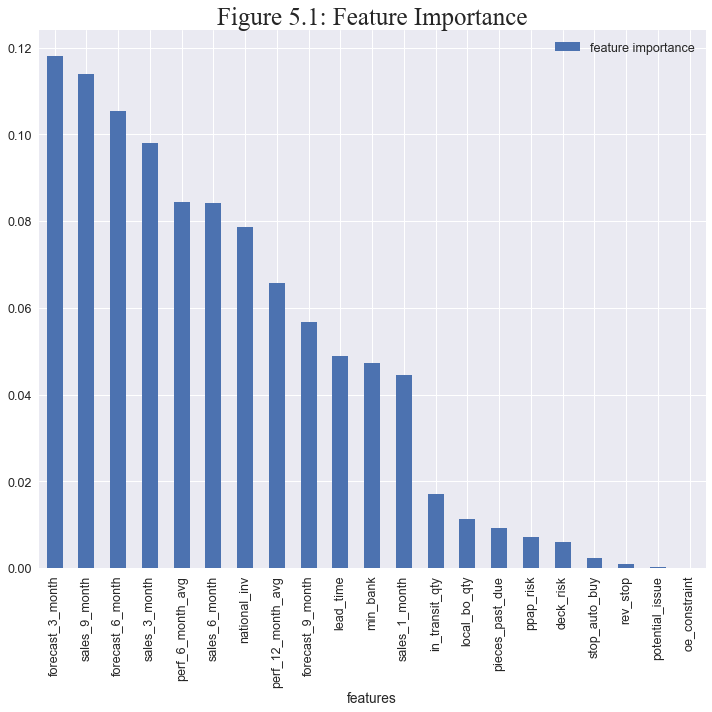

In [49]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

fi = pd.DataFrame()
fi['features'] = df_test_normalized.columns[:21]
fi['feature importance'] = xgb2.feature_importances_
fi = fi.sort(['feature importance'], ascending = [0])
print fi

# plot
fi.plot(kind='bar', x='features', figsize = (10, 10))
plt.title('Figure 5.1: Feature Importance', size = 25, **csfont)
plt.tight_layout()
plt.savefig('plots/f8.jpeg')


In [50]:
# train model with top 10 features
IF = fi['features'][:10]

mIFpred, mIFprob = modelfit(xgb2, df_normalized, IF)
mIFTpred, mIFTprob = modelfit(xgb2, df_test_normalized, IF)

pIF, rIF, fIF, kIF, aIF = getValues(mIFpred, mIFprob, df_normalized)
pIFT, rIFT, fIFT, kIFT, aIFT = getValues(mIFTpred, mIFTprob, df_test_normalized)

IFsamples= pd.DataFrame([[pIF, pIFT], [rIF, rIFT], [fIF, fIFT], [kIF, kIFT], [aIF, aIFT]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['Training Set', 'Test Set'])
print IFsamples

[0]	train-error:0.0057264+6.23044e-05	test-error:0.0072786+8.05645e-05
[1]	train-error:0.0055796+3.61475e-05	test-error:0.0068208+8.90065e-05
[2]	train-error:0.005613+0.000258184	test-error:0.0067324+0.000112379
[3]	train-error:0.005524+0.00029398	test-error:0.0066554+5.80607e-05
[4]	train-error:0.0052982+0.000246175	test-error:0.0066202+6.82185e-05
[5]	train-error:0.005094+0.000197789	test-error:0.0065976+8.75091e-05
[6]	train-error:0.0049238+0.000179513	test-error:0.0065672+8.82845e-05
[7]	train-error:0.0047222+0.000117677	test-error:0.0065444+6.91248e-05
[8]	train-error:0.0045184+0.000106944	test-error:0.0065218+8.79668e-05
[9]	train-error:0.0043444+6.48771e-05	test-error:0.0064788+8.75954e-05
[10]	train-error:0.0041838+4.38972e-05	test-error:0.0064602+6.80864e-05
[11]	train-error:0.0040298+3.84832e-05	test-error:0.0064224+7.94244e-05
[12]	train-error:0.003853+4.45286e-05	test-error:0.0064092+8.4464e-05
[13]	train-error:0.0036912+4.46739e-05	test-error:0.0063884+9.02698e-05
[0]	trai

In [51]:
# train model with top 5 features
IF = fi['features'][:5]

mIFpred, mIFprob = modelfit(xgb2, df_normalized, IF)
mIFTpred, mIFTprob = modelfit(xgb2, df_test_normalized, IF)

pIF, rIF, fIF, kIF, aIF = getValues(mIFpred, mIFprob, df_normalized)
pIFT, rIFT, fIFT, kIFT, aIFT = getValues(mIFTpred, mIFTprob, df_test_normalized)

IF2samples= pd.DataFrame([[pIF, pIFT], [rIF, rIFT], [fIF, fIFT], [kIF, kIFT], [aIF, aIFT]], 
                        index=['Precision', 'Recall', 'F1 score', 'Kappa', 'AUC' ], 
                        columns=['Training Set', 'Test Set'])
print IF2samples

[0]	train-error:0.0067632+2.58488e-05	test-error:0.006966+9.1876e-05
[1]	train-error:0.0068236+3.70761e-05	test-error:0.0069032+8.77688e-05
[2]	train-error:0.0068036+3.10908e-05	test-error:0.006895+8.81998e-05
[3]	train-error:0.0067834+2.61885e-05	test-error:0.006892+8.35009e-05
[4]	train-error:0.0067556+2.50248e-05	test-error:0.0068938+8.09973e-05
[5]	train-error:0.0067282+2.12264e-05	test-error:0.0068784+8.61269e-05
[6]	train-error:0.006677+2.66608e-05	test-error:0.0068754+8.58291e-05
[7]	train-error:0.0066158+2.08844e-05	test-error:0.0068628+8.88603e-05
[8]	train-error:0.006555+1.73321e-05	test-error:0.006854+8.80977e-05
[9]	train-error:0.006468+2.46171e-05	test-error:0.0068376+8.09113e-05
[10]	train-error:0.006378+2.42074e-05	test-error:0.0068194+7.62485e-05
[11]	train-error:0.0062806+3.20037e-05	test-error:0.006818+8.63273e-05
[12]	train-error:0.0061602+4.74738e-05	test-error:0.0068112+8.5586e-05
[13]	train-error:0.0060484+5.09455e-05	test-error:0.006789+8.17288e-05
[0]	train-erro

In [59]:
y_test = df_test_normalized['went_on_backorder']
X_test = df_test_normalized.drop(labels='went_on_backorder', axis=1) 

### References

Backorder. (2017, July 19). Retrieved from http://www.businesspundit.com/encyclopedia/general-business/backorder/